
### **Exploratory Data Analysis**

At this stage, after cleaning the data, the next step is to analyze the data by importing the required libraries.

In [36]:
#import scientific computing libraries
import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import algorithmic libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier

After importing, next is to create a dataframe and display the top 5

In [3]:
df = pd.read_csv("Titanic.csv", index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Next is to check the condition of the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Next is to display the number of NaN from the dataset

In [5]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Next is to display the calculation of the dataset column which is of type integer or float.

In [6]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In this section, display the unique values ​​of the sex column

In [7]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In this section, display the number of unique values ​​of the column sex

In [8]:
df.Sex.nunique()

2

Returns the proportion of unique data for categorical data types

In [9]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

Displays the number of rows and the number of columns of a dataset

In [10]:
df.shape

(891, 11)

Showing the presence of duplicate data

In [11]:
df[df.duplicated()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


Drop duplicate data from the dataset

In [12]:
df.drop_duplicates()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


##**Column Embarked**



The case is the same as in the previous column. The total number of data entries is 891, while the embarked column is 889. This means that there are nulls in the embarked column

In [14]:
df.Embarked[df.Embarked.isnull()]

PassengerId
62    NaN
830   NaN
Name: Embarked, dtype: float64

In [15]:
df.Embarked.isnull()

PassengerId
1      False
2      False
3      False
4      False
5      False
       ...  
887    False
888    False
889    False
890    False
891    False
Name: Embarked, Length: 891, dtype: bool

After that, display the proportion of data on the embarked column.

In [16]:
df.Embarked.value_counts() # Data proportion

0.0    644
1.0    168
2.0     77
Name: Embarked, dtype: int64

After seeing the proportion, do the imputation by checking the data type first. It is known that the data type is categorical data, so the imputation uses the mode (mode) of the proportion on the embarked column data, namely S.

In [17]:
val = df.Embarked.mode().values[0]
df['Embarked'] = df.Embarked.fillna(val)


After the imputation, the proportion of the data has changed

In [18]:
df.Embarked.value_counts()

0.0    646
1.0    168
2.0     77
Name: Embarked, dtype: int64

The embarked data is still an object data type, to facilitate the analysis process. Then it will be converted to a numeric data type.

In [19]:
df.Embarked = df.Embarked.map({'S': 0, 'C': 1, 'Q':2})

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  0 non-null      float64
dtypes: float64(3), int64(4), object(4)
memory usage: 83.5+ KB


##**Column Age**

In column age, a specific examination will be carried out on the data. In the first stage, a histogram will be visualized. A histogram is a graph that organizes and displays numerical data in the form of an image, showing groups of data and the amount or percentage of data that belongs to each group.

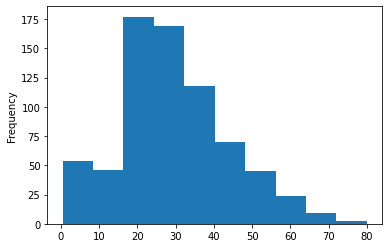

In [21]:
df['Age'].plot(kind='hist') # Visualize column age by using the histogram

After the visualization is done, the next step is to see the description of the data from the column age. At the description stage, several mathematical analyzes will be displayed such as the number, mean and so on

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


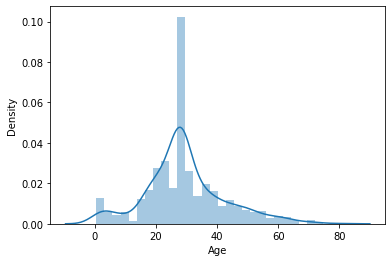

In [24]:
import seaborn as sns
sns.distplot(df['Age'])

In [22]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Based on these two specific examinations. It can be concluded that the histogram has a skewness distribution. This means that there is asymmetry (asymmetry) of a data distribution. The slope is divided into 3, namely symmetrical, tilted to the right and tilted to the left. The solution that can be applied to this problem is the imputation technique using the median so that the data distribution is even. The imputation technique is filling in the missing data with statistical techniques. While the median is the middle value of the sorted data.

In [23]:
val = df.Age.median()
df['Age'] = df.Age.fillna(val)

After that, a re-examination is carried out to ensure the quality of the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In addition, there are also anomalies and outliers. To see the visualization as follows

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


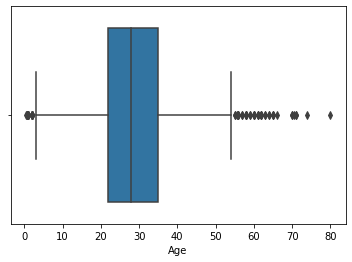

In [25]:
sns.boxplot(df['Age'])

##**Column Cabin**



The number of data entries should be 891. But in the column cabin there are only 291. This means that there are quite a lot of null data in the column cabin. For further details, the proportion of data from the column cabin is shown.

In [26]:
df.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

After doing the proportion, there are a lot of missing values. So, the best solution that can be done is to delete the data or delete the column cabin. In addition, the data in the column cabin is also not very informative for further decisions

In [27]:
df.drop('Cabin', axis=1, inplace = True) # True (permanent)

Checking data again.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  0 non-null      float64
dtypes: float64(3), int64(4), object(3)
memory usage: 76.6+ KB


## **Column Name**

Because the column name has too many unique data and it is not too informative to know the survived data. Then it's better if the column name is deleted

In [29]:
df.drop('Name', axis=1, inplace = True)


Do a check

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  0 non-null      float64
dtypes: float64(3), int64(4), object(2)
memory usage: 69.6+ KB


## **Sex**

Change the data type in the sex column so that it can be analyzed

In [31]:
df.Sex = df.Sex.map({'male': 0, 'female': 1})

Displays dataset info to see column sex whether the data type has changed

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  0 non-null      float64
dtypes: float64(3), int64(5), object(1)
memory usage: 69.6+ KB


In [33]:
df.Sex.value_counts()

0    577
1    314
Name: Sex, dtype: int64

## Column Ticket

Delete the column ticket, because it is not very informative for the data survived

In [34]:
df.drop('Ticket', axis=1, inplace = True)


Do a re-check

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  0 non-null      float64
dtypes: float64(3), int64(5)
memory usage: 62.6 KB



### **Survived Data Visualization**

Displays the proportion of data survived

In [37]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Survived / Non Survived')

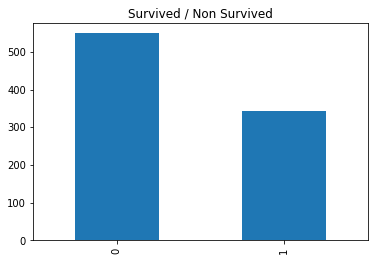

In [38]:
df.Survived.value_counts().plot(kind='bar')
plt.title('Survived / Non Survived')

After that, create a dataframe of column survived

In [47]:
df_survived = pd.DataFrame(df.Survived.value_counts())

In [48]:
df_survived['Status'] = [0, 1]

In [42]:
df_survived

,Survived,Status
0,549,0
1,342,1


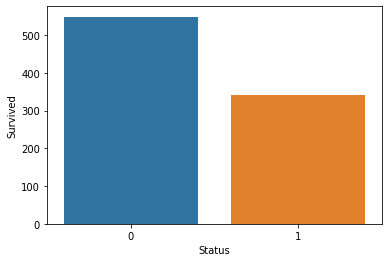

In [49]:
sns.barplot(x = 'Status', y = 'Survived', data = df_survived)

In [44]:
df_survived2 = pd.DataFrame(df.Survived.value_counts())
df_survived2['Status'] = ['dead', 'alive']
df_survived2

,Survived,Status
0,549,dead
1,342,alive


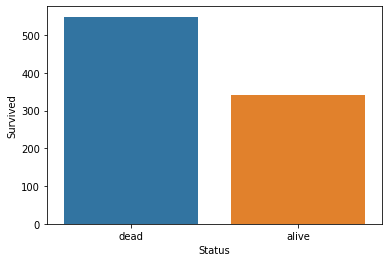

In [45]:
sns.barplot(x = 'Status', y = 'Survived', data = df_survived2)